<a href="https://colab.research.google.com/github/claragomes1/artificial-intelligence/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [28]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
import matplotlib.pyplot as plt

plt.gray()

for i in range(4):
  plt.matshow(digits.images[i])

In [ ]:
df = pd.DataFrame(digits.data)
df

In [32]:
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['target'], axis='columns'), digits.target, test_size = 0.2)

In [34]:
len(X_test)

360

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [36]:
model.verbose = 1

In [37]:
model.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(verbose=1)

In [38]:
model.score(X_test, Y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9916666666666667

In [39]:
Y_predict = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [40]:
from sklearn.metrics import confusion_matrix


In [41]:
confusion = confusion_matrix(Y_test, Y_predict)
confusion

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 41]])

Text(69.0, 0.5, 'Truth')

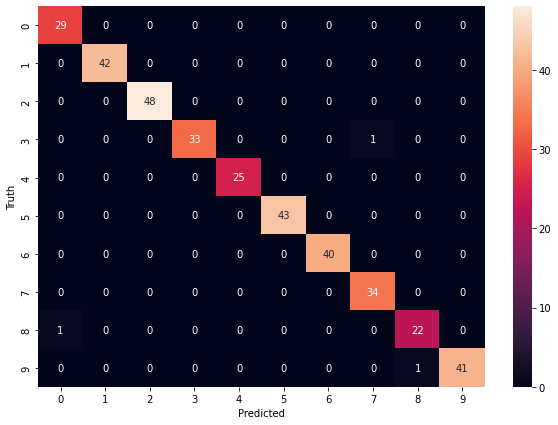

In [42]:
import matplotlib.pyplot as plt
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')